# MVA Mini Project 1

Student: Pierre-Louis Guhur - pierre-louis.guhur@ens-paris-saclay.fr

# 1. Getting started

In [28]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
#from shutil import copyfile
#copyfile(src="../input/mp1.py", dst = "../working/mp1.py")
from mp1 import *

import keras
from keras import optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D,Activation, MaxPooling1D
from keras.layers import Dropout
from keras.layers import Flatten

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Simple Classification

Example of the classes to classify

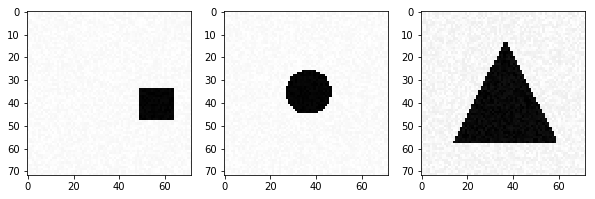

In [2]:
plt.figure(figsize=(10,10))

plt.subplot(131)
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(72,72), cmap='gray')

plt.subplot(132)
im = generate_a_disk(10)
plt.imshow(im.reshape(72,72), cmap='gray')

plt.subplot(133)
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(72,72), cmap='gray')

plt.show()

models = {}
n_classes = 3
n_hidden = 64

In [95]:
X_train, Y_train = generate_dataset_classification(300, 20, False)
X_test, Y_test = generate_test_set_classification(300, 20, False)

Creating data: 100%|██████████| 300/300 [00:03<00:00, 79.36it/s]


## 2.1 Training a model with SGD

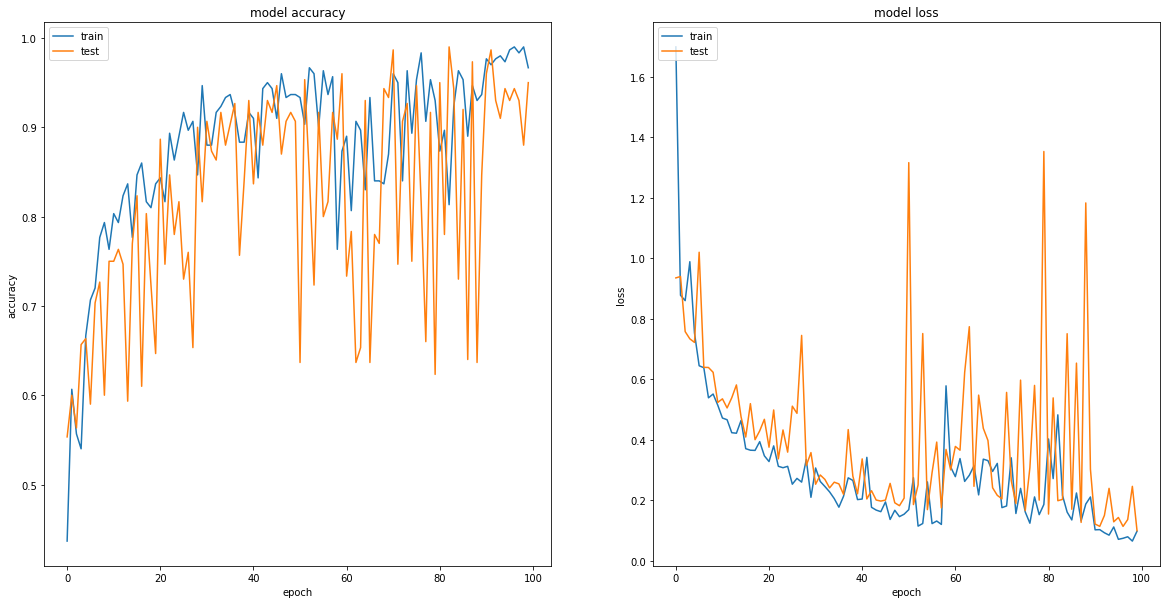

In [96]:
models['sgd'] = Sequential()
models['sgd'].add(Dense(n_hidden, activation='relu', input_shape=(X_train.shape[1],)))
models['sgd'].add(Dense(n_classes, activation='softmax'))
models['sgd'].compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = models['sgd'].fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=0)
plot_history(history)

## 2.2 Training a model with Adam

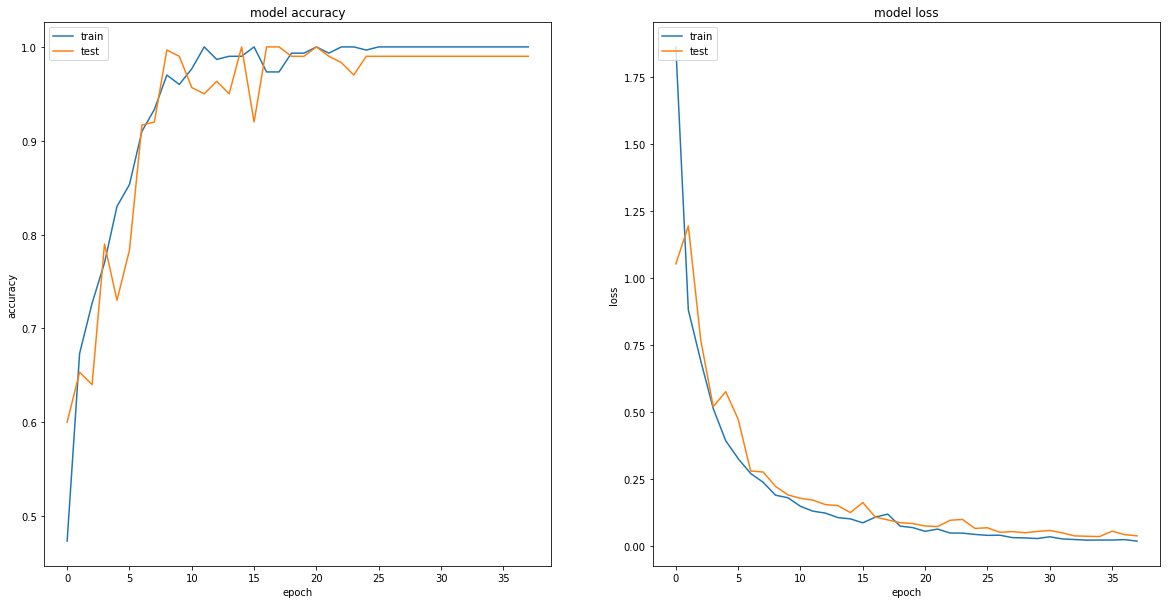

In [97]:
early_stopping_monitor = EarlyStopping(patience = 3)

models['adam'] = Sequential()
models['adam'].add(Dense(n_hidden, activation='relu', input_shape=(X_train.shape[1],)))
models['adam'].add(Dense(n_classes, activation='softmax'))
models['adam'].compile(optimizer='adam', loss='categorical_crossentropy', 
                       metrics=['accuracy'])
history = models['adam'].fit(X_train, Y_train, batch_size=32, epochs=100, 
                             validation_data=(X_test, Y_test), callbacks=[early_stopping_monitor], verbose=0)
plot_history(history)

# 3. Visualization of the Solution

In [30]:
print(models['adam'].summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                331840    
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 195       
Total params: 332,035
Trainable params: 332,035
Non-trainable params: 0
_________________________________________________________________
None


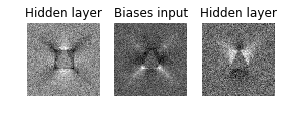

In [57]:
weights = models['adam'].get_weights()
image = weights[0] @ weights[2]
n_layers = len(weights)
titles = ["Hidden layer", "Biases input", "Hidden layer"]

for k in range(3):
    plt.subplot(1, n_layers, k + 1)
    plt.imshow(image[:, k].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title(titles[k])
    plt.axis("off")

plt.show()

# 4. A More Difficult Classification Problem

In [111]:
X_train, Y_train = generate_dataset_classification(600, 20, True)
X_test, Y_test = generate_test_set_classification(300, 20, True)

Creating data: 100%|██████████| 300/300 [00:03<00:00, 82.51it/s]


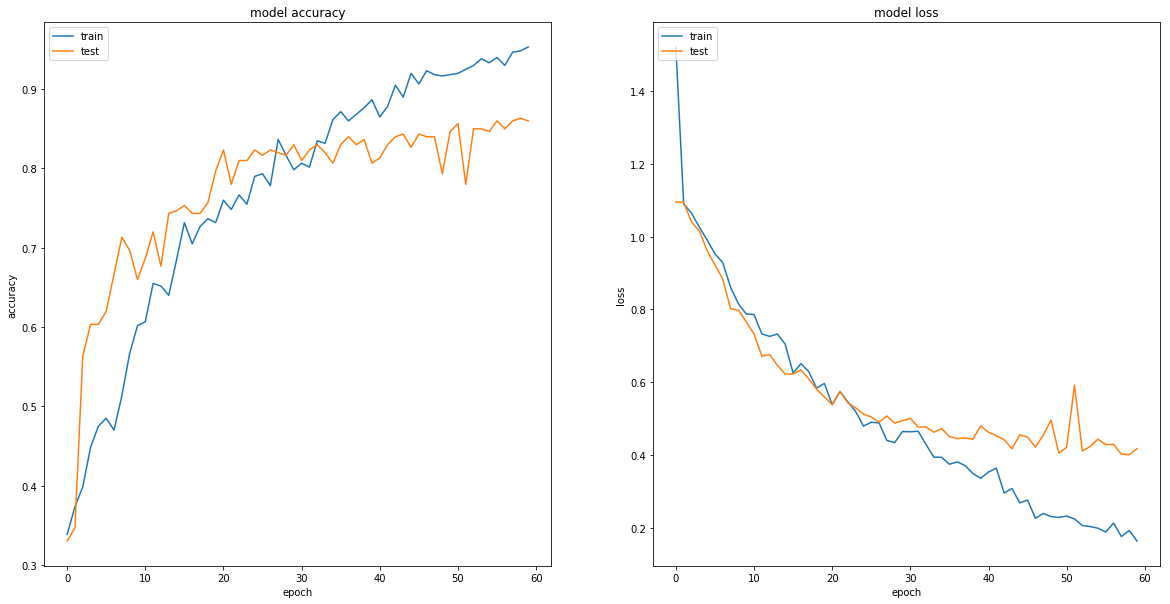

In [115]:
models['convnet'] = Sequential()
models['convnet'].add(Conv2D(16,(5,5), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1))) #filters
models['convnet'].add(MaxPooling2D(pool_size=(2,2))) #pooling layer
models['convnet'].add(Dropout(0.5))
models['convnet'].add(Flatten())
models['convnet'].add(Dense(64, activation='relu'))
models['convnet'].add(Dropout(0.5))
models['convnet'].add(Dense(n_classes, activation='softmax'))
models['convnet'].compile(optimizer='adam', loss='categorical_crossentropy', 
                       metrics=['accuracy'])


X_train2 = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, -1).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, -1).astype('float32')

history = models['convnet'].fit(X_train2, Y_train, batch_size=32, epochs=60, 
                             validation_data=(X_test2, Y_test), verbose=0)

plot_history(history)

In [120]:
evaluation = models['convnet'].evaluate(X_test2, Y_test)
print(f"Evaluation on the test set: accuracy {evaluation[1]*100:.2f}% - loss {evaluation[0]*100:.2f}%")

300/300 [==============================] - 0s 464us/step
Evaluation on the test set: accuracy 86.00% - loss 41.70%


# 5. A Regression Problem

Creating data: 100%|██████████| 300/300 [00:03<00:00, 80.43it/s]


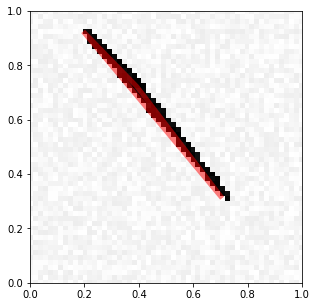

In [41]:
[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()

def normalize_triangle(Y):
    return (Y - np.mean(Y, axis=0))/(np.std(Y) + 1e-8)

def normalize_triangle1(Y):
    p =[[Y[0], Y[1], np.sqrt(Y[0]**2 + Y[1]**2)],
    [Y[2], Y[3], np.sqrt(Y[2]**2 + Y[3]**2)],
    [Y[4], Y[5], np.sqrt(Y[4]**2 + Y[5]**2)]]
    p.sort(key=lambda x:x[2])
    y = np.array([p[0][0], p[0][1], p[1][0], p[1][1], p[2][0], p[2][1]])
    return y

Y_train_n = normalize_triangle(Y_train)
#for i in range(X_train.shape[0]):
#    Y_train_n[i] = normalize_triangle(Y_train[i])
    
Y_test_n = normalize_triangle(Y_test)
#for i in range(X_test.shape[0]):
#    Y_test_n[i] = normalize_triangle(Y_test[i])
    
X_train2d = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1).astype('float32')
X_test2d = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1).astype('float32')

visualize_prediction(X_train[0], Y_train[0])

In [46]:
from keras.layers import BatchNormalization

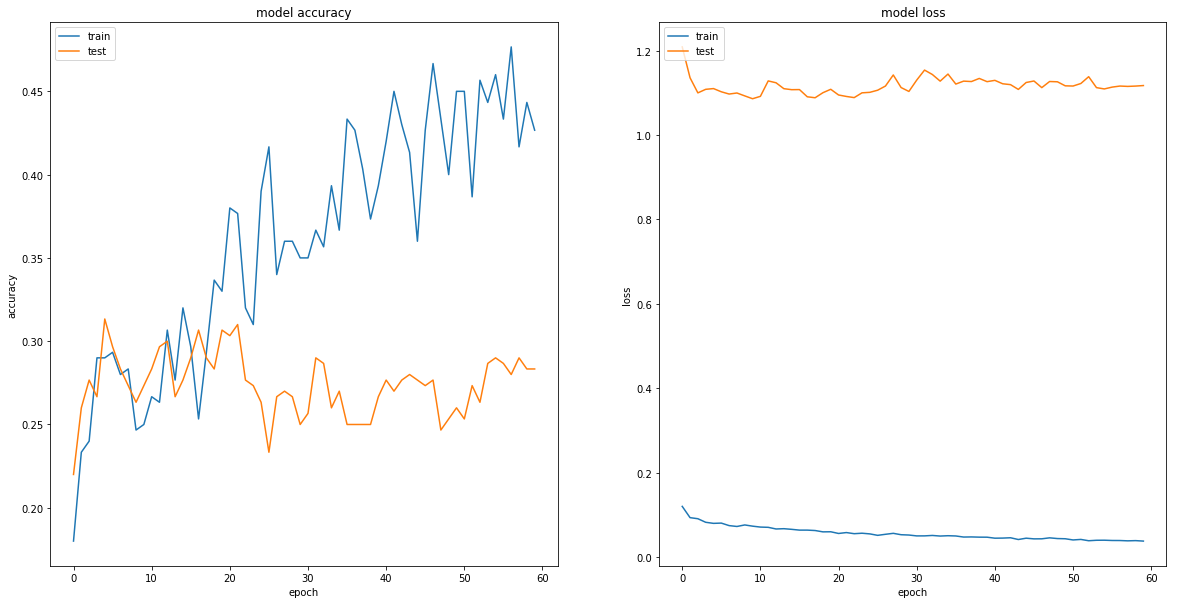

300/300 [==============================] - 0s 1ms/step
Evaluation on the test set: accuracy 26.00% - loss 6.86%


In [56]:
models['regr'] = Sequential()
models['regr'].add(Conv2D(64, activation='relu', input_shape=(72,72,1), kernel_size=(5,5), padding="same"))
models['regr'].add(BatchNormalization())
models['regr'].add(MaxPooling2D(pool_size=(2,2), padding="same"))
models['regr'].add(Dropout(0.4))
models['regr'].add(Conv2D(32, (3,3), activation="relu", padding="same"))
models['regr'].add(MaxPooling2D(pool_size=(2,2), padding="same"))
models['regr'].add(Dropout(0.4))
models['regr'].add(Conv2D(16, (3,3), activation="relu", padding="same"))
models['regr'].add(MaxPooling2D(pool_size=(2,2), padding="same"))
models['regr'].add(Dropout(0.4))
models['regr'].add(Flatten())

#models['regr'].add(Dense(256, activation='relu'))
#models['regr'].add(MaxPooling1D(pool_size=3, padding="same"))
#models['regr'].add(Dropout(0.4))
#models['regr'].add(Dense(256, activation='relu'))
#models['regr'].add(Dropout(0.4))
models['regr'].add(Dense(128))
models['regr'].add(BatchNormalization())
models['regr'].add(Activation('relu'))

#models['regr'].add(MaxPooling2D(pool_size=(4), padding="same"))
models['regr'].add(Dropout(0.3))
models['regr'].add(Dense(6, activation='sigmoid'))


# model3 = Sequential()
# model3.add(Conv2D(16,(5,5), activation='relu', input_shape=(72,72,1))) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Conv2D(32,(5,5), activation='relu')) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Conv2D(64,(5,5), activation='relu')) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Flatten())
# model3.add(Dense(64))
# model3.add(Activation('relu'))
# model3.add(Dropout(0.5))
# model3.add(Dense(6))


models['regr'].compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = models['regr'].fit(X_train2d, Y_train, batch_size=32, epochs=60, shuffle=True, 
           validation_data=(X_test2d, Y_test_n), verbose=0)
plot_history(history)
evaluation = models['regr'].evaluate(X_test2d, Y_test)
print(f"Evaluation on the test set: accuracy {evaluation[1]*100:.2f}% - loss {evaluation[0]*100:.2f}%")

In [ ]:
models['regr'] = Sequential()
models['regr'].add(Conv2D(64, activation='relu', input_shape=(72,72,1), kernel_size=(5,5), padding="same"))
models['regr'].add(BatchNormalization())
models['regr'].add(MaxPooling2D(pool_size=(2,2), padding="same"))
models['regr'].add(Dropout(0.4))
models['regr'].add(Conv2D(32, (3,3), activation="relu", padding="same"))
models['regr'].add(MaxPooling2D(pool_size=(2,2), padding="same"))
models['regr'].add(Dropout(0.4))
models['regr'].add(Conv2D(16, (3,3), activation="relu", padding="same"))
models['regr'].add(MaxPooling2D(pool_size=(2,2), padding="same"))
models['regr'].add(Dropout(0.4))
models['regr'].add(Flatten())

#models['regr'].add(Dense(256, activation='relu'))
#models['regr'].add(MaxPooling1D(pool_size=3, padding="same"))
#models['regr'].add(Dropout(0.4))
#models['regr'].add(Dense(256, activation='relu'))
#models['regr'].add(Dropout(0.4))
models['regr'].add(Dense(128))
models['regr'].add(BatchNormalization())
models['regr'].add(Activation('relu'))

#models['regr'].add(MaxPooling2D(pool_size=(4), padding="same"))
models['regr'].add(Dropout(0.3))
models['regr'].add(Dense(6, activation='sigmoid'))


# model3 = Sequential()
# model3.add(Conv2D(16,(5,5), activation='relu', input_shape=(72,72,1))) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Conv2D(32,(5,5), activation='relu')) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Conv2D(64,(5,5), activation='relu')) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Flatten())
# model3.add(Dense(64))
# model3.add(Activation('relu'))
# model3.add(Dropout(0.5))
# model3.add(Dense(6))


models['regr'].compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = models['regr'].fit(X_train2d, Y_train, batch_size=32, epochs=60, shuffle=True, 
           validation_data=(X_test2d, Y_test_n), verbose=0)
plot_history(history)
evaluation = models['regr'].evaluate(X_test2d, Y_test)
print(f"Evaluation on the test set: accuracy {evaluation[1]*100:.2f}% - loss {evaluation[0]*100:.2f}%")

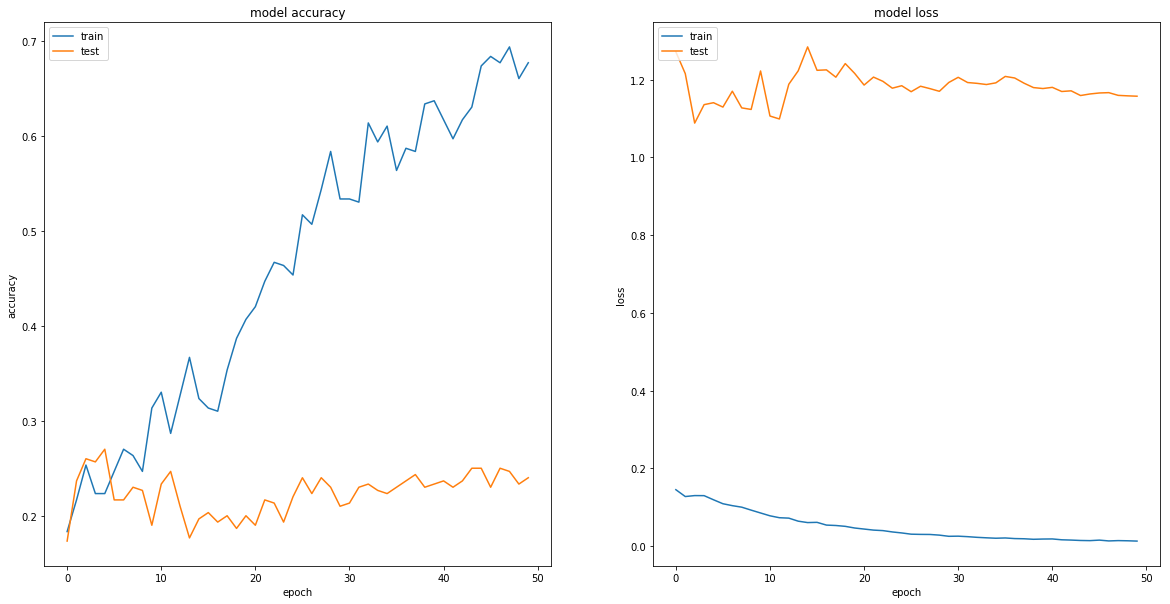

300/300 [==============================] - 0s 721us/step
Evaluation on the test set: accuracy 24.00% - loss 115.75%


In [62]:
number_filter_regression = 32
filter_size = (5,5)
pixel_window = (2,2)
model_5 = Sequential()
model_5.add(Conv2D(32, activation='relu', input_shape=(72,72,1), kernel_size=(5,5), padding="same"))
model_5.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model_5.add(Dropout(0.5))
model_5.add(Conv2D(32, (5,5), activation="relu", padding="same"))
model_5.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model_5.add(Dropout(0.25))
model_5.add(Flatten())
model_5.add(Dense(256))
model_5.add(Activation('relu'))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.25))
#model_5.add(Dense(256, activation='relu'))
#model_5.add(Dropout(0.25))
#model_5.add(Dense(128, activation='relu'))
#model_5.add(Dropout(0.25))
model_5.add(Dense(6, activation='sigmoid'))

model_5.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model_5.fit(X_train2d, Y_train, batch_size=32, epochs=50, shuffle=True, 
           validation_data=(X_test2d, Y_test_n), verbose=0)
plot_history(history)
evaluation = model_5.evaluate(X_test2d, Y_test_n)
print(f"Evaluation on the test set: accuracy {evaluation[1]*100:.2f}% - loss {evaluation[0]*100:.2f}%")

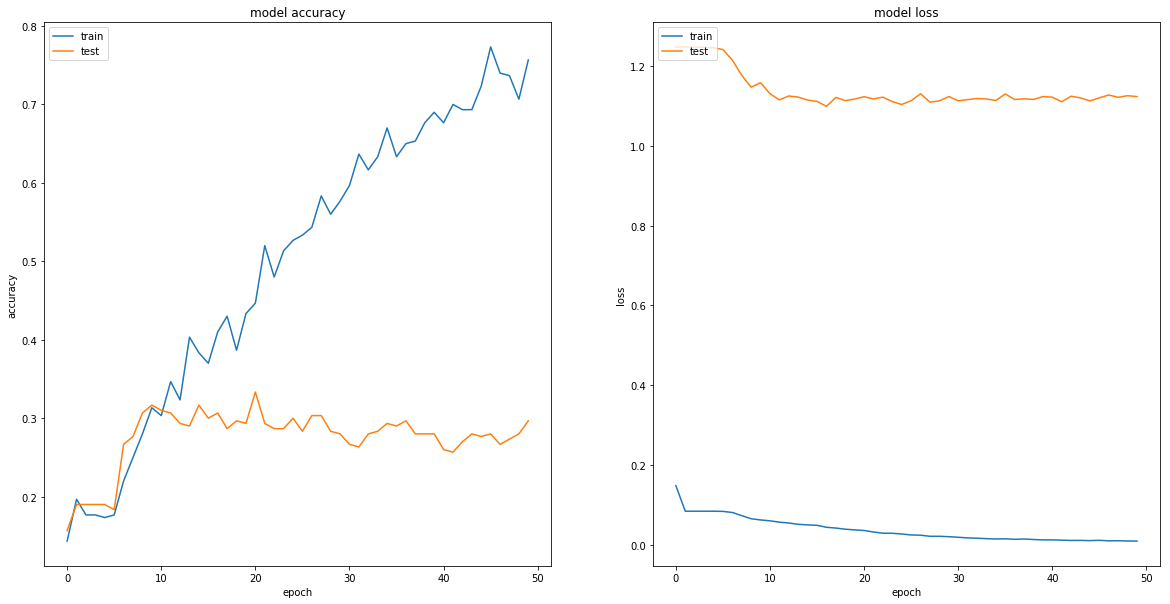

300/300 [==============================] - 0s 671us/step
Evaluation on the test set: accuracy 29.67% - loss 112.33%


In [61]:
number_filter_regression = 32
filter_size = (5,5)
pixel_window = (2,2)
model_5 = Sequential()
model_5.add(Conv2D(32, activation='relu', input_shape=(72,72,1), kernel_size=(5,5), padding="same"))
model_5.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model_5.add(Dropout(0.5))
model_5.add(Conv2D(32, (5,5), activation="relu", padding="same"))
model_5.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model_5.add(Dropout(0.25))
model_5.add(Flatten())
model_5.add(Dense(256))
model_5.add(Activation('relu'))
#model_5.add(BatchNormalization())
model_5.add(Dropout(0.25))
#model_5.add(Dense(256, activation='relu'))
#model_5.add(Dropout(0.25))
#model_5.add(Dense(128, activation='relu'))
#model_5.add(Dropout(0.25))
model_5.add(Dense(6, activation='sigmoid'))

model_5.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model_5.fit(X_train2d, Y_train, batch_size=32, epochs=50, shuffle=True, 
           validation_data=(X_test2d, Y_test_n), verbose=0)
plot_history(history)
evaluation = model_5.evaluate(X_test2d, Y_test_n)
print(f"Evaluation on the test set: accuracy {evaluation[1]*100:.2f}% - loss {evaluation[0]*100:.2f}%")

In [37]:
for i in range(5):
    print(Y_train[i])
#print(Y_train_n[0])

[0.27284303 0.03592646 0.86327431 0.72486971 0.87858537 0.24194761]
[0.43213841 0.24214736 0.4149962  0.57937957 0.28566174 0.76354439]
[0.11653238 0.88062482 0.68809883 0.88259703 0.9158613  0.02624232]
[0.35750991 0.00698195 0.23885783 0.84231949 0.09333429 0.19693097]
[0.98498552 0.90587129 0.85497015 0.97364102 0.22142041 0.91932252]
